A way to determine areas of greatest precipitation and generate imagery for that sector.

In [8]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from metpy.units import units
import numpy as np
from shapely.geometry import Point, Polygon

%matplotlib inline

conus=[-120, -65, 28, 50]
conus_envelope = Polygon([(conus[0],conus[2]),(conus[0],conus[3]),
                          (conus[1],conus[3]),(conus[1],conus[2]),
                          (conus[0],conus[2])])

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("grid", envelope=conus_envelope)
request.setLocationNames("NAM40")
request.setLevels("0.0SFC")
request.setParameters("TP")

cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-2], times)

Calculate accumulated precipitation

In [9]:
for i, tt in enumerate(fcstRun):
    response = DataAccessLayer.getGridData(request, [tt])
    grid = response[0]
    if i>0:
        data += grid.getRawData()
    else:
        data = grid.getRawData()
    data[data <= -9999] = 0
    print(data.min(), data.max(), grid.getDataTime().getFcstTime()/3600)
    

lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
fcstHr = int(grid.getDataTime().getFcstTime()/3600)

tp_inch = data * (0.0393701)
print(tp_inch.min(), tp_inch.max())

0.0 0.0 0.0
0.0 32.1875 3.0
0.0 52.125 6.0
0.0 74.375 9.0
0.0 77.125 12.0
0.0 78.625 15.0
0.0 78.75 18.0
0.0 78.75 21.0
0.0 79.375 24.0
0.0 82.25 27.0
0.0 84.0 30.0
0.0 84.6875 33.0
0.0 85.625 36.0
0.0 87.3125 39.0
0.0 87.75 42.0
0.0 87.75 45.0
0.0 89.375 48.0
0.0 127.875 51.0
0.0 139.5625 54.0
0.0 139.6875 57.0
0.0 140.5625 60.0
0.0 140.625 63.0
0.0 140.625 66.0
0.0 140.625 69.0
0.0 140.625 72.0
0.0 140.625 75.0
0.0 140.625 78.0
0.0 140.625 81.0
0.0 140.625 84.0
0.0 5.5364203


Determine lat/lon of maximum rainfall value:

In [10]:
ii,jj = np.where(tp_inch==tp_inch.max())
i=ii[0]
j=jj[0]
point = Point(lons[i][j], lats[i][j])

Draw CONUS map

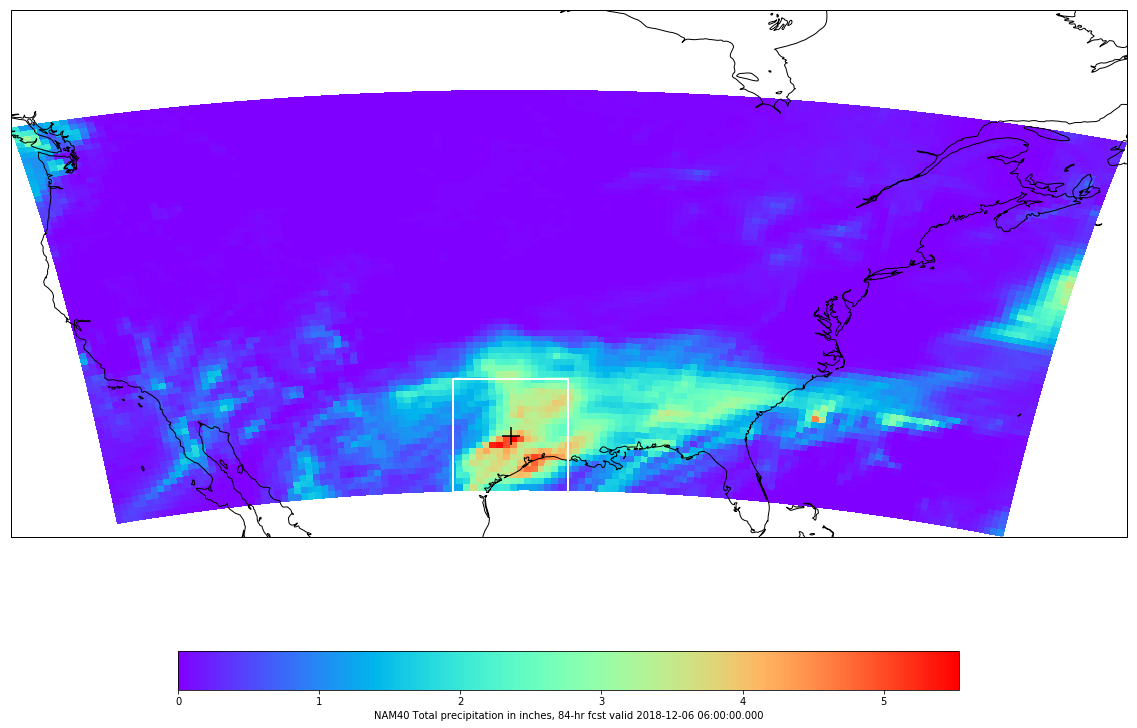

In [11]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20, 14),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    return fig, ax

cmap = plt.get_cmap('rainbow')
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(lons, lats, tp_inch, cmap=cmap)
cbar = fig.colorbar(cs, shrink=0.7, orientation='horizontal')
cbar.set_label(grid.getLocationName() + " Total precipitation in inches, " \
               + str(fcstHr) + "-hr fcst valid " + str(grid.getDataTime().getRefTime()))

ax.scatter(point.x, point.y, s=300,
           transform=ccrs.PlateCarree(),marker="+",facecolor='black')

inc = 3.5
box=[point.x-inc, point.x+inc, point.y-inc, point.y+inc]
polygon = Polygon([(box[0],box[2]),(box[0],box[3]), 
                   (box[1],box[3]),(box[1],box[2]),
                   (box[0],box[2])])
ax.add_geometries([polygon], ccrs.PlateCarree(), facecolor='none', edgecolor='white', linewidth=2)

Now create a new gridded data request with a geometry envelope for our Region of Interest

0.0 1.853 1.0
0.0 3.5290003 2.0
0.0 5.0290003 3.0
0.0 5.051 4.0
0.0 5.2960005 5.0
0.0 5.2960005 6.0
0.0 5.8269997 7.0
0.0 6.1790004 8.0
0.0 6.1890006 9.0
0.0 9.071 10.0
0.0 10.812 11.0
0.0 14.718 12.0
0.0 18.295 13.0
0.0 21.339 14.0
0.0 22.626 15.0
0.0 28.670002 16.0
0.0 32.334 17.0
0.0 36.628002 18.0
0.0 1.4420482


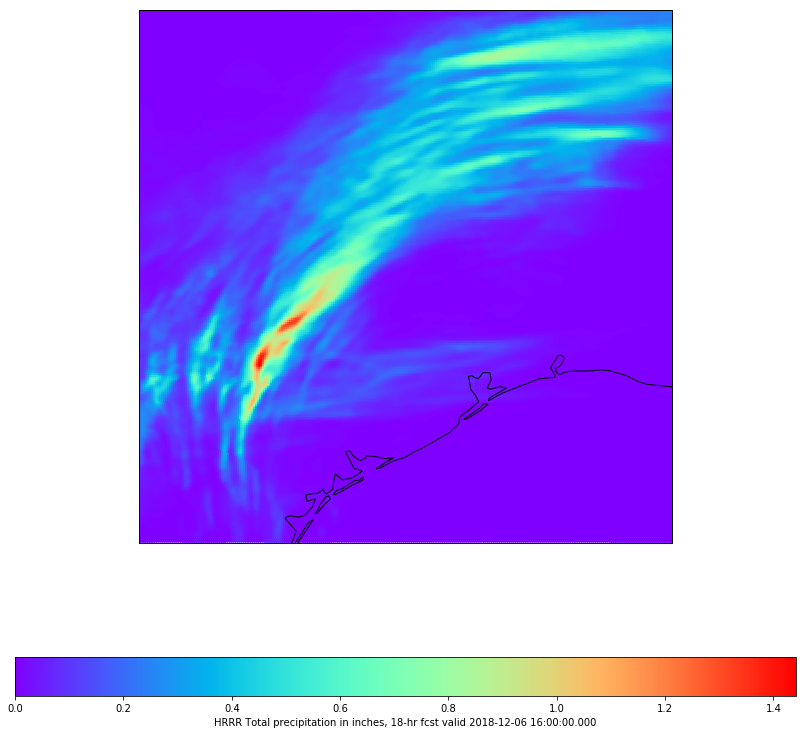

In [12]:
request = DataAccessLayer.newDataRequest("grid", envelope=polygon)
request.setLocationNames("HRRR")
request.setLevels("0.0SFC")
request.setParameters("TP")

cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-2], times)


for i, tt in enumerate(fcstRun):
    response = DataAccessLayer.getGridData(request, [tt])
    grid = response[0]
    if i>0:
        data += grid.getRawData()
    else:
        data = grid.getRawData()
    data[data <= -9999] = 0
    print(data.min(), data.max(), grid.getDataTime().getFcstTime()/3600)
    

lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
fcstHr = int(grid.getDataTime().getFcstTime()/3600)

tp_inch = data * (0.0393701)
print(tp_inch.min(), tp_inch.max())

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20, 14),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    return fig, ax

cmap = plt.get_cmap('rainbow')
fig, ax = make_map(bbox=box)
cs = ax.pcolormesh(lons, lats, tp_inch, cmap=cmap)
cbar = fig.colorbar(cs, shrink=0.7, orientation='horizontal')
cbar.set_label(grid.getLocationName() + " Total precipitation in inches, " \
               + str(fcstHr) + "-hr fcst valid " + str(grid.getDataTime().getRefTime()))